# India House Price Prediction Challenge

This is a regression problem because we have a continuous target variable and the feautures with which we shall use to train our model.
Below are the 12 variables which are contained in the datasets.


* This Dataset has the following variables:

Column and it's                                       Description
* POSTED_BY  -                                 Category marking who has listed the property
* UNDER_CONSTRUCTION -                        Under Construction or Not
* RERA -                                       Rera approved or Not
* BHK_NO -                                     Number of Rooms
* BHKORRK -                                    Type of property
* SQUARE_FT -                                  Total area of the house in square feet
* READYTOMOVE -                                Category marking Ready to move or Not
* RESALE -                                     Category marking Resale or not
* ADDRESS -                                    Address of the property
* LONGITUDE -                                  Longitude of the property
* LATITUDE -                                   Latitude of the property
* TARGET -                                     Price in lacs

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
trainD=pd.read_csv('../input/house-price-prediction-challenge/train.csv')
testD =pd.read_csv('../input/house-price-prediction-challenge/test.csv')

In [4]:
#getting to know the kind of data we have
trainD.shape,testD.shape

((29451, 12), (68720, 11))

In [5]:
trainD.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [6]:
testD.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [7]:
#displaying some more detials about the data
trainD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


From the above display, we can note that there are no rows with missing values among other information
that we can extract such as the various data types of the columns

In [8]:
#brief statistics  about numerical variables
trainD.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


The above code shows that we have  houses with very high prices of about 30000 lacs. These could be probably fancy ones. The median price is about 62 implying that most houses are relatively cheaper.

In [9]:
#brief statistics  about categorical variables
trainD.describe(include=['O'])

,POSTED_BY,BHK_OR_RK,ADDRESS
count,29451,29451,29451
unique,3,2,6899
top,Dealer,BHK,"Zirakpur,Chandigarh"
freq,18291,29427,509


The code above shows us that we have 3 categorical variables, very many records with unique addresses
among other information that is extractable

In [10]:
#lets examine the count of  values in the posted_by categorical variable.
posted_counts= pd.value_counts(trainD.POSTED_BY)
posted_counts

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

The above code shows us that most house records have been posted by dealers, followed by owners and then builders post the least.

****Lets do an exploratory data analysis on the data to train our models.****

<Figure size 720x576 with 0 Axes>

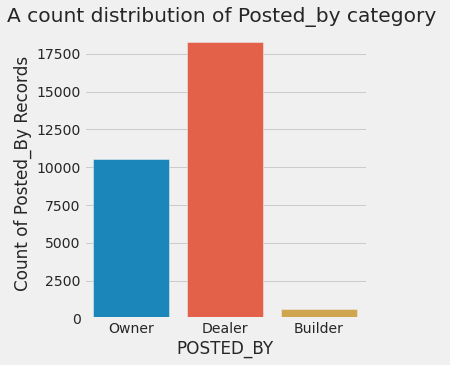

In [11]:
# A categorical plot of POSTED_BY variable
plt.figure(figsize=(10,8))
ax=sns.catplot(x='POSTED_BY',kind='count',data=trainD)
plt.xlabel('POSTED_BY')
plt.ylabel('Count of Posted_By Records')
plt.title('A count distribution of Posted_by category ')
plt.show()

In [12]:
UNDER_CONSTRUCTION_counts= pd.value_counts(trainD.UNDER_CONSTRUCTION)
UNDER_CONSTRUCTION_counts

0    24157
1     5294
Name: UNDER_CONSTRUCTION, dtype: int64

<Figure size 720x576 with 0 Axes>

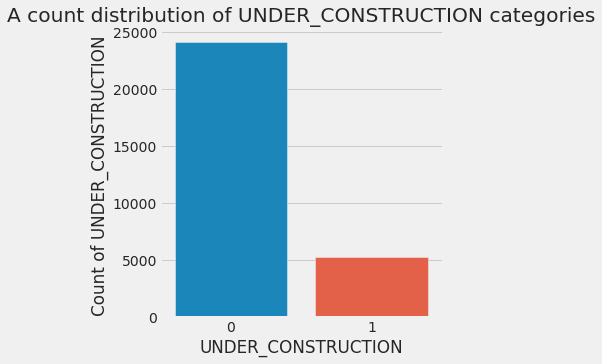

In [13]:
# A plot of UNDER_CONSTRUCTION categories
plt.figure(figsize=(10,8))
ax=sns.catplot(x='UNDER_CONSTRUCTION',kind='count',data=trainD)
plt.xlabel('UNDER_CONSTRUCTION')
plt.ylabel('Count of UNDER_CONSTRUCTION ')
plt.title('A count distribution of UNDER_CONSTRUCTION categories')
plt.show()

The above code and visualisation shows that we have about 24k records of houses not under construction  and about 5k records of houses under construction.

In [14]:
RERA_counts= pd.value_counts(trainD.RERA)
RERA_counts

0    20088
1     9363
Name: RERA, dtype: int64

<Figure size 720x576 with 0 Axes>

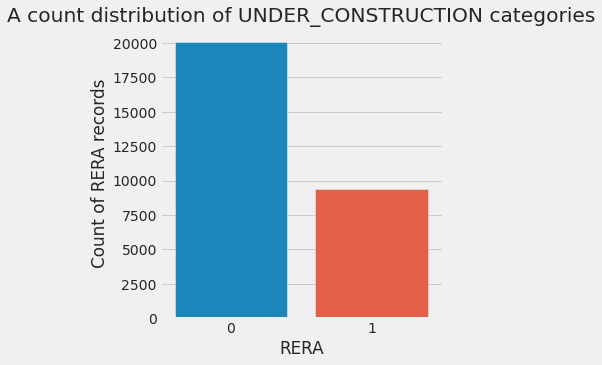

In [15]:
# A plot of RERA categories
plt.figure(figsize=(10,8))
ax=sns.catplot(x='RERA',kind='count',data=trainD)
plt.xlabel('RERA')
plt.ylabel('Count of RERA records')
plt.title('A count distribution of UNDER_CONSTRUCTION categories')
plt.show()

The code above and visualisation shows that we have about 20k recordes that are not approved by RERA and about 10k records  approved by RERA

In [16]:
BHK_NO_counts= pd.value_counts(trainD['BHK_NO.'])
BHK_NO_counts

2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
15        4
10        4
20        4
12        3
9         3
13        1
11        1
17        1
Name: BHK_NO., dtype: int64

<Figure size 720x576 with 0 Axes>

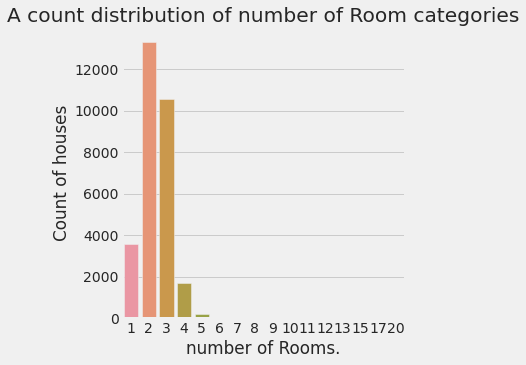

In [17]:
# A plot of BHK_NO categories
plt.figure(figsize=(10,8))
ax=sns.catplot(x='BHK_NO.',kind='count',data=trainD)
plt.xlabel('number of Rooms.')
plt.ylabel('Count of houses')
plt.title('A count distribution of number of Room categories')
plt.show()

The above code shows us that most  houses are majorly built with 2 rooms or 3 then followed by 1,4,5. the other number of rooms are highly skewed with few records

In [18]:
BHK_OR_RKcounts= pd.value_counts(trainD['BHK_OR_RK'])
BHK_OR_RKcounts

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64

<Figure size 720x576 with 0 Axes>

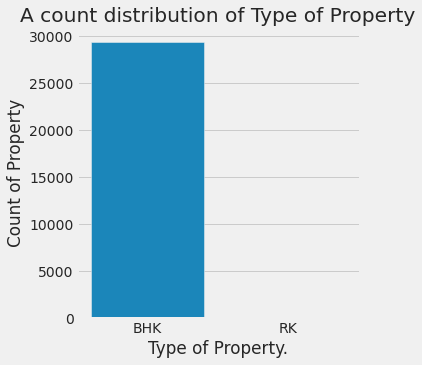

In [19]:
# A plot of property type
plt.figure(figsize=(10,8))
ax=sns.catplot(x='BHK_OR_RK',kind='count',data=trainD)
plt.xlabel('Type of Property.')
plt.ylabel('Count of Property')
plt.title('A count distribution of Type of Property')
plt.show()

The above code shows that the major property type is BHK with close to 30k records constituting almost all the records posted

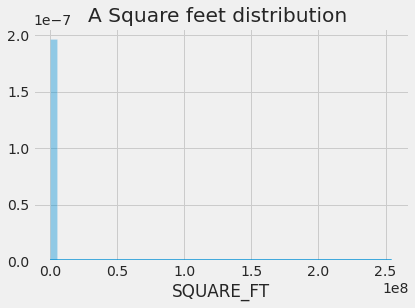

In [20]:
#visualise the square feet of the data using seaborn distribution plot.
ax=sns.distplot(trainD.SQUARE_FT,kde=True)
plt.title('A Square feet distribution ')
plt.show()

In [21]:
# decreasing the skewness in square feet feature using log transformation in both train and test data
trainD['SQUARE_FT'] = np.log(trainD['SQUARE_FT'])
testD['SQUARE_FT'] = np.log(testD['SQUARE_FT'])

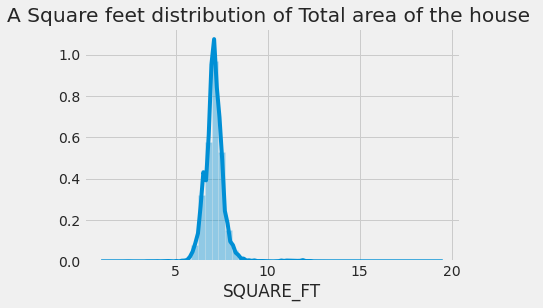

In [22]:
#Aplot close to normal distribution as a result of decrease in skewness
ax=sns.distplot(trainD.SQUARE_FT,kde=True)
plt.title('A Square feet distribution of Total area of the house ')
plt.show()

In [23]:
READY_TO_MOVE_counts= pd.value_counts(trainD['READY_TO_MOVE'])
READY_TO_MOVE_counts

1    24157
0     5294
Name: READY_TO_MOVE, dtype: int64

<Figure size 720x576 with 0 Axes>

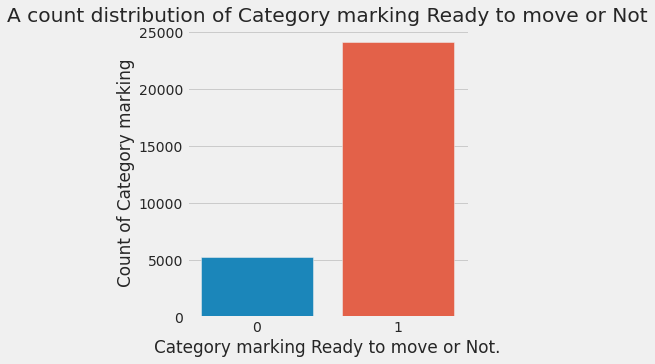

In [24]:
# A plot of Category marking Ready to move or Not
plt.figure(figsize=(10,8))
ax=sns.catplot(x='READY_TO_MOVE',kind='count',data=trainD)
plt.xlabel('Category marking Ready to move or Not.')
plt.ylabel('Count of Category marking')
plt.title('A count distribution of Category marking Ready to move or Not')
plt.show()

In [25]:
Resale_counts= pd.value_counts(trainD['RESALE'])
Resale_counts

1    27377
0     2074
Name: RESALE, dtype: int64

<Figure size 720x576 with 0 Axes>

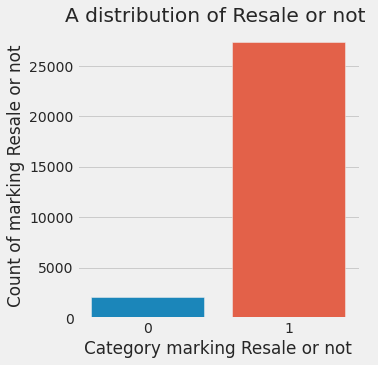

In [26]:
# A plot of Resale records or not
plt.figure(figsize=(10,8))
ax=sns.catplot(x='RESALE',kind='count',data=trainD)
plt.xlabel('Category marking Resale or not')
plt.ylabel('Count of marking Resale or not ')
plt.title('A distribution of Resale or not ')
plt.show()

The above code and visual shows that over 90% of houses are available for resale  and just a few not available for  resale.

**For my analysis here, i won't include the address variable.It needs further manipulation before it can become more informative  and be used in our modelling since it's a text variable yet our models work best with numbers.**

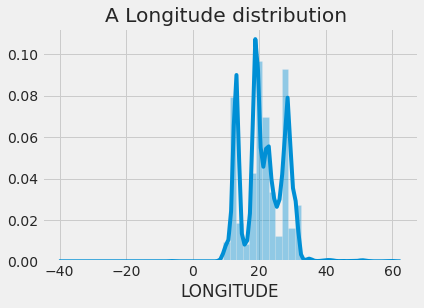

In [27]:
#visualise the square feet of the data using seaborn distribution plot.
ax=sns.distplot(trainD.LONGITUDE,kde=True)
plt.title('A Longitude distribution ')
plt.show()

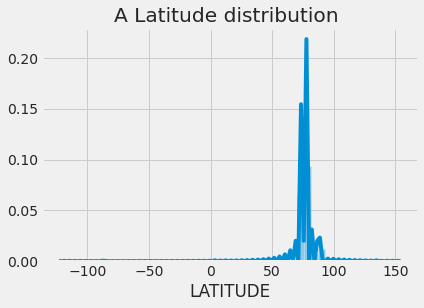

In [28]:
#visualise the square feet of the data using seaborn distribution plot.
ax=sns.distplot(trainD.LATITUDE,kde=True)
plt.title('A Latitude distribution ')
plt.show()

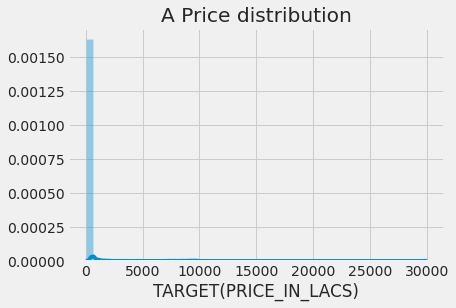

In [29]:
#visualise the square feet of the data using seaborn distribution plot.
ax=sns.distplot(trainD['TARGET(PRICE_IN_LACS)'],kde=True)
plt.title('A Price distribution')
plt.show()

In [30]:
trainD['TARGET(PRICE_IN_LACS)'].describe()

count    29451.000000
mean       142.898746
std        656.880713
min          0.250000
25%         38.000000
50%         62.000000
75%        100.000000
max      30000.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [31]:
#Lets examine the house with the highest price
trainD[trainD['TARGET(PRICE_IN_LACS)']==30000]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
11238,Dealer,0,0,3,BHK,19.049289,1,1,"R.T. Nagar,Bangalore",13.0189,77.5963,30000.0


The code above shows that the highest house price was posted by category dealer, it's available for resale,it has got 3 rooms and  it goes for upto 30000 lacs .

In [32]:
#Lets examine the house with the lowest price
trainD[trainD['TARGET(PRICE_IN_LACS)']==0.25]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
14036,Owner,0,0,3,BHK,7.561682,1,1,"Bomikhal,Bhubaneswar",20.28238,85.855363,0.25


The code above shows that the lowest house price was posted by category owner,it's not under construction, it has got 3 rooms , it's available for resale and it's ready to be occupied

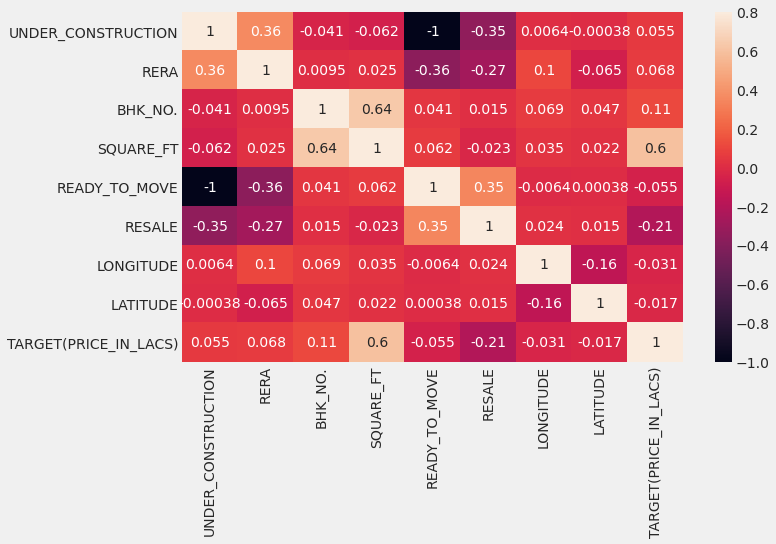

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(trainD.corr(),vmax=0.8, annot=True)

We can see from the above heat map that the target is more correlated to the square feet feature than any other numerical columns.
we will probably use all these features in our modeling process

**Lets investigate if there is a relationship between number of rooms  and the prices**

In [34]:
BHK_NO_counts= pd.value_counts(trainD['BHK_NO.'])
BHK_NO_counts = list(BHK_NO_counts[BHK_NO_counts.values > 1000].index)

In [35]:
BHK_NO_counts

[2, 3, 1, 4]

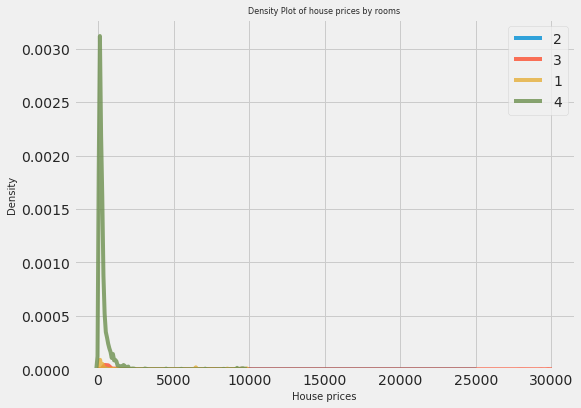

In [36]:
# Plot of distribution of sprices for rooms
plt.figure(figsize=(8,6))

# Plot each room distribution of prices
for BHK in BHK_NO_counts:
    # Select the room category
    subset = trainD[trainD['BHK_NO.'] == BHK]
    
    # Density plot of prices
    sns.kdeplot(subset['TARGET(PRICE_IN_LACS)'],label = BHK,shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('House prices', size = 10); plt.ylabel('Density', size = 10); 
plt.title('Density Plot of house prices by rooms', size = 8);

The room price distribution is largely skewed to the right with room category 4 having a high density distribution

In [37]:
#lets investigate the relationship between posted_by and prices.
posted_counts= pd.value_counts(trainD.POSTED_BY)
posts=posted_counts.index

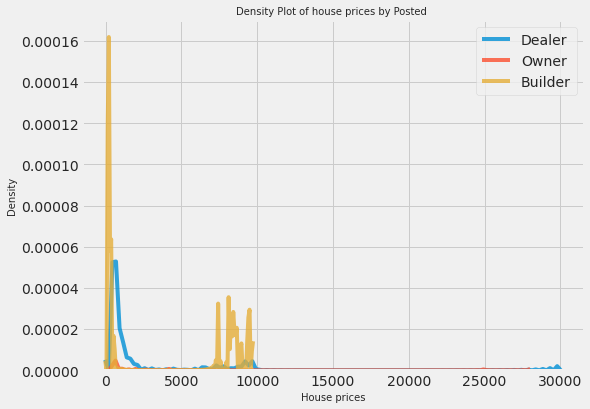

In [38]:
# Plot of distribution of Prices for Posted_By
plt.figure(figsize=(8,6))

# Plot each Posted_by distribution of prices
for post in posts:
    # Select the posted_by type
    subset = trainD[trainD['POSTED_BY'] == post]
    
    # Density plot of prices
    sns.kdeplot(subset['TARGET(PRICE_IN_LACS)'],label = post,shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('House prices', size = 10); plt.ylabel('Density', size = 10); 
plt.title('Density Plot of house prices by Posted ', size = 10);

The distribution of posted_by variable is largely skewed to the right with dealers having generaly high prices, with the builder category having more prices centered around median thus having a high density distribution

In [39]:
base_features = ['POSTED_BY','UNDER_CONSTRUCTION','RERA','BHK_NO.','BHK_OR_RK','SQUARE_FT','LONGITUDE','LATITUDE']

In [40]:
train_data = trainD[base_features]
test_data=   testD[base_features]

In [41]:
train_data.shape,test_data.shape

((29451, 8), (68720, 8))

In [42]:
y = trainD['TARGET(PRICE_IN_LACS)']

In [43]:
cat_cols = [cname for cname in train_data.columns 
                    if  train_data[cname].dtype == "object"]

In [44]:
Train_cat_colsOH= pd.get_dummies(train_data[cat_cols])
Test_cat_colsOH= pd.get_dummies(test_data[cat_cols])

In [45]:
#Select numerical columns
num_cols = [cname for cname in train_data.columns 
            if train_data[cname].dtype in ['int64', 'float64']]

scaler = StandardScaler()
train_data[num_cols] = scaler.fit_transform(train_data[num_cols] )

In [46]:
test_data[num_cols] = scaler.transform(test_data[num_cols] )

In [47]:
train_num_data = pd.DataFrame(train_data[num_cols])
test_num_data = pd.DataFrame(test_data[num_cols])

In [48]:
train_data =pd.concat([Train_cat_colsOH, train_num_data],axis=1) 
test_data =pd.concat([Test_cat_colsOH, test_num_data],axis=1) 

In [49]:
train_data.head()

,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,LONGITUDE,LATITUDE
0,0,0,1,1,0,-0.468134,-0.682715,-0.44624,0.140453,-1.342478,0.072011
1,0,1,0,1,0,-0.468134,-0.682715,-0.44624,0.107433,-1.454541,-0.018289
2,0,0,1,1,0,-0.468134,-0.682715,-0.44624,-0.418411,-1.373400,0.075254
3,0,0,1,1,0,-0.468134,1.464741,-0.44624,-0.424268,1.183208,0.048004
4,0,1,0,1,0,2.136139,-0.682715,-0.44624,-0.303533,0.208204,1.103210


In [50]:
test_data.head()

,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,LONGITUDE,LATITUDE
0,0,0,1,1,0,-0.468134,-0.682715,-1.583797,-1.323908,-0.006165,-0.358984
1,0,1,0,1,0,2.136139,1.464741,-0.446240,-0.677798,-0.376159,-0.349457
2,0,1,0,1,0,-0.468134,-0.682715,-0.446240,0.083609,0.208204,1.103210
3,0,1,0,1,0,-0.468134,-0.682715,0.691318,0.265395,0.916658,-0.118692
4,0,0,1,1,0,-0.468134,-0.682715,-1.583797,-1.721846,0.225576,-0.375815


In [51]:
# split validation set from training data
X_train, X_val, y_train, y_val =train_test_split(train_data,y,test_size=0.2,random_state=0)

In [52]:
# function to  train a given  model and evaluate it on the validation set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    y_pred=model.predict(X_val)
    mea = mean_absolute_error(y_val,y_pred)
    R2_score =r2_score(y_val,y_pred)
    rmse = np.sqrt((mean_squared_error(y_val, y_pred)))
    print("The root mean squared error generated...is {:.2f}".format(rmse))
    print("The R2_score value .....................is {:.4f}".format(R2_score))
    print("The mean absolute  error generated is .......is {:.2f}".format(mea))

In [53]:
Ridge_model = Ridge()

fit_and_evaluate(Ridge_model) 

The root mean squared error generated...is 488.62
The R2_score value .....................is 0.4799
The mean absolute  error generated is .......is 220.99


In [54]:
linear_model = LinearRegression()

fit_and_evaluate(linear_model)

The root mean squared error generated...is 488.61
The R2_score value .....................is 0.4799
The mean absolute  error generated is .......is 221.02


In [55]:
random_forest = RandomForestRegressor(random_state=0)

fit_and_evaluate(random_forest)

The root mean squared error generated...is 139.87
The R2_score value .....................is 0.9574
The mean absolute  error generated is .......is 30.56


In [56]:
gradient_boosted = GradientBoostingRegressor(random_state=4)

fit_and_evaluate(gradient_boosted) 

The root mean squared error generated...is 146.92
The R2_score value .....................is 0.9530
The mean absolute  error generated is .......is 41.59


**The metric am caring more about is the model with the a least considerable root mean sqaured value,therefore am going to take the gradient boosting model for this prediction since it has more paramters to tune than the random forest. However, for me to furture improve on my accuracy, am going to user another metric of mean absolute error generated using the random search as the baseline then fine tune with gridsearch basing on the variation in the number of estimators.**

In [57]:
# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

#loss function to be minimized
loss = ['ls', 'lad', 'huber']

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]
#how much the contribution of each tree will shrink.

learning_rate = [0.005,0.01,0.05,0.1,0.5]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

In [58]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'learning_rate':learning_rate,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [59]:
model = GradientBoostingRegressor(random_state=4)

In [60]:
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               scoring='neg_mean_absolute_error',
                               cv=5, n_iter=30, 
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [61]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 88.1min finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=4),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': [0.005, 0.01, 0.05,
                                                          0.1, 0.5],
                                        'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

In [62]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)
random_results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_loss,param_learning_rate,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
11,260.971274,2.643498,0.373167,0.004043,1500,2,auto,10,huber,0.05,...,-35.571389,3.779320,1,-5.257924,-5.577775,-5.037972,-5.476600,-5.621897,-5.394433,0.218085
4,45.976026,0.346261,0.118587,0.001320,900,6,auto,5,ls,0.1,...,-36.226340,5.057914,2,-16.262290,-16.171530,-15.910801,-15.871869,-16.041353,-16.051568,0.149001
6,29.886509,0.289912,0.167617,0.004273,1500,6,log2,3,huber,0.5,...,-37.355271,2.954526,3,-20.452217,-20.309075,-20.552448,-19.745959,-19.702431,-20.152426,0.358369


In [63]:
random_cv.best_estimator_

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=10,
                          max_features='auto', n_estimators=1500,
                          random_state=4)

In [64]:
# Create a range of trees to evaluate
param_grid = {'n_estimators': [200,300,400,500, 800,1000 ]}
model =  GradientBoostingRegressor( max_depth =15,
                                   loss = 'ls',
                                   alpha=0.9,
                                   learning_rate=0.1,
                                  min_samples_leaf = 1,
                                  min_samples_split = 6,
                                  max_features ='auto',
                                  max_leaf_nodes=None,
                                  random_state = 4)


In [65]:
# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=param_grid, cv = 5, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [66]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 10.3min finished


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=15,
                                                 max_features='auto',
                                                 min_samples_split=6,
                                                 random_state=4),
             n_jobs=-1,
             param_grid={'n_estimators': [200, 300, 400, 500, 800, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

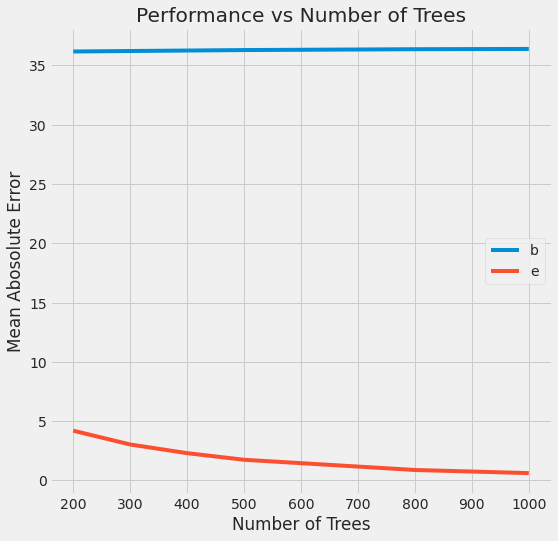

In [67]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
plt.figure(figsize=(8, 8))
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Test_Err')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Train_Err')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend("best");
plt.title('Performance vs Number of Trees');

We realise that as we increase the number of trees, the model starts overfitting 
however, we shall consider the optimum value of the model before it starts to overfit with 200 estimators

In [68]:
results.sort_values('mean_test_score', ascending = False).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,28.677016,0.259678,0.118769,0.036806,200,{'n_estimators': 200},-35.390231,-31.740031,-35.151858,-45.518643,...,-36.176884,4.861927,1,-4.322412,-4.353775,-4.052732,-4.163390,-4.070816,-4.192625,0.124961
1,42.832550,0.420909,0.130314,0.004246,300,{'n_estimators': 300},-35.387762,-31.776904,-35.206379,-45.603512,...,-36.218193,4.881469,2,-3.148363,-3.151798,-2.857560,-3.072996,-2.916722,-3.029488,0.121045
2,57.302642,0.112112,0.181394,0.032745,400,{'n_estimators': 400},-35.423869,-31.836611,-35.225887,-45.676509,...,-36.258090,4.895255,3,-2.427905,-2.375652,-2.144253,-2.345868,-2.197894,-2.298315,0.108495


In [69]:
# Select the best model
final_modelGBR = grid_search.best_estimator_
final_modelGBR

GradientBoostingRegressor(max_depth=15, max_features='auto',
                          min_samples_split=6, n_estimators=200,
                          random_state=4)

In [70]:
#final model performance

fit_and_evaluate(final_modelGBR)

The root mean squared error generated...is 129.22
The R2_score value .....................is 0.9636
The mean absolute  error generated is .......is 29.70


**After fitting my final model, my model performance price prediction greatly improved to approximately within 30 points from the  true market price with a root mean squared error of 129 and an R2_score accuracy value of 96%**

In [71]:
SalesPrediction = final_modelGBR.predict(test_data)

In [72]:
submission = pd.DataFrame({'Id': test_data.index, 'SalePrice': SalesPrediction})
submission.to_csv('submission.csv', index=False)
submission.head(10).set_index('Id')

,SalePrice
Id,
0,20.187270
1,65.104742
2,63.179359
3,31.970004
4,9.951544
5,20.798480
6,47.593008
7,89.544028
8,36.411804


All comments are welcome! there is always room for improvement.